In [60]:
from torchvision import models

In [61]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [62]:
alexnet = models.AlexNet()
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [63]:
# 활성화 함수
# Relu

In [64]:
# ResNet-101
# 스킵커넥션(Skip Connection, Residual Block):
# W.x 학습대신에 f(x) 잔차(residual) (입력 x와의 차이)만 학습
# 초기 x의 값이 지름길을 통해 뒤쪽 레이어까지 직접전달... 층이 깊을수록 기울기가 소실되는 문제를 해결
# 100층을 넘어가면 기울기가 소실되거나 폭팔하는 현상 필연적..
# H(x) = F(x) + x
resnet = models.resnet101(pretrained=False)
resnet

c:\Users\31799\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\31799\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [65]:
# alexnet.eval()   모델을 평가할 때 평가모드로 전환
# 모델내의 배치 정규화 층, 드랍아웃층이 평가모드로 작동
# 배치정규화 : 학습에는 현재 배치의 평균과 분산사용 평가모드가 되면 학습과정 전체에서 누적된 평균/분산
# 드랍아웃: 학습시에는 랜덤하게 뉴런을 끄지만, 평가모드로 전환되면 모든 뉴런을 사용
# alexnet(x_test) 예측

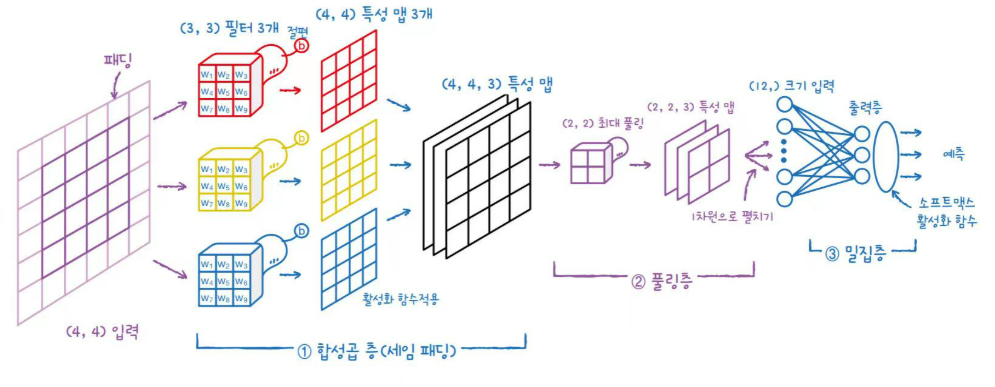

In [66]:
# 합성곱 연산 -> 이미지의 특징을 추출
# convolution - CNN
# 28 28 3 너비 높이 깊이 3차원 텐서

In [67]:
import torch
import torch.nn as nn

In [68]:
# 배치크기 X 채널 크기 X 높이 X 너비
inputs = torch.Tensor(1, 1, 28, 28) # 배치크기 1, 채널 1(RGB), 높이 28, 너비 28  
print(f'텐서의 크기: {inputs.size()}')

텐서의 크기: torch.Size([1, 1, 28, 28])


In [69]:
# 합성공층과 풀링층 정의
conv1 = nn.Conv2d(1,32,3, padding=1)  # 특성맵 stride = 1, padding = 1  28x28x1  ->  28x28x32
print(conv1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [70]:
# 2번째 합성공 층
conv2 = nn.Conv2d(32,64,3, padding=1)  # 특성맵 stride = 1, padding = 1  28x28x32  ->  28x28x64
print(conv2)

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [71]:
pool = nn.MaxPool2d(2)
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [72]:
# 데이터 통과하기
out = conv1(inputs)
out.size()  # 1x32x28x28

torch.Size([1, 32, 28, 28])

In [73]:
out = pool(out)
out.size()  # 1x32x14x14

torch.Size([1, 32, 14, 14])

In [74]:
out = conv2(out)
out.size()  # 1x64x14x14

torch.Size([1, 64, 14, 14])

In [75]:
out = pool(out)
out.size()  # 1x64x7x7

torch.Size([1, 64, 7, 7])

In [76]:
out = out.view(out.size(0), -1)  # 배치크기 X (채널 X 높이 X 너비)  1x(64x7x7) = 1x3136
out.size()  # 1x3136

torch.Size([1, 3136])

In [77]:
fc = nn.Linear(64*7*7, 10)  # 완전연결층 정의  3136 -> 10
out = fc(out)
out.size()  # 1x10

torch.Size([1, 10])

In [78]:
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

In [79]:
# C, H, W 
transform = transforms.Compose([  # transform 변수에 저장!
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform,  # transforms 모듈이 아닌 transform 변수!
)
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform,  # transforms 모듈이 아닌 transform 변수!
)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [80]:
import numpy as np

for data in train_dataset:
    print(data[0].size())  # 이미지 텐서 크기 출력
    break

torch.Size([1, 28, 28])


In [81]:
for data in train_loader:
    images, labels = data
    print(images.size())  # 배치크기 X 채널 X 높이 X 너비
    print(labels.size())  # 배치크기
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [93]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()  # 64 1 28 28
        self.conv1 = nn.Conv2d(1,32,3,padding=1)   
        self.conv2 = nn.Conv2d(32,64,3,padding=1)
        self.pool = nn.MaxPool2d(2)        
        self.fc1 = nn.Linear( 64*7*7, 128)
        self.fc2 = nn.Linear(128 , 10)
    def forward(self,x):        
        x = self.pool(F.relu(self.conv1(x)))  # (64,1,28,28)  -> (64,32,14,14)
        x = self.pool(F.relu(self.conv2(x)))  # (64,32,14,14)  -> (64,64,7,7)
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))  # 64x1568 and 3136x128
        out = self.fc2(x)
        return out
model = CNN()
device = torch.device('cuda'  if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()  # 손실함수  내부에 소프트맥스 + 로그손실계산 다중클래스 계산
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [83]:
len(train_loader)  # 60000 / 64 = 937.5 -> 938

938

In [84]:
# 훈련 루프
num_epochs = 5
for epoch in range(num_epochs):
    model.train() # 드랍아웃, 배치노말.. 기능성 레이어(층) 활성화
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # 기울기 초기화
        outputs = model(inputs)  # 순전파
        loss = criterion(outputs, labels)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 갱신
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/5], Loss: 0.4308
Epoch [2/5], Loss: 0.2728
Epoch [2/5], Loss: 0.2728
Epoch [3/5], Loss: 0.2245
Epoch [3/5], Loss: 0.2245
Epoch [4/5], Loss: 0.1940
Epoch [4/5], Loss: 0.1940
Epoch [5/5], Loss: 0.1693
Epoch [5/5], Loss: 0.1693


In [85]:
# 평가
model.eval() # 평가모드로 전환
correct = 0
total = 0
with torch.no_grad():  # 그래디언트 계산 비활성화(메모리 절약)
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

Test Accuracy: 92.04%


In [86]:
X,y  = next(iter(test_loader))
_, predicted = torch.max(model(X.to(device)), 1)
predicted[:5], y[:5], predicted[-5:], y[-5:]

(tensor([9, 2, 1, 1, 6]),
 tensor([9, 2, 1, 1, 6]),
 tensor([0, 7, 7, 8, 5]),
 tensor([0, 7, 7, 8, 5]))

#### 컬러이미지 C 3

In [87]:
# C,H,W 형식으로 바꿔주는 것이 ToTensor

transform = transforms.Compose([transforms.ToTensor()])
test = torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)

mean = torch.zeros(3)
std = torch.zeros(3)

for data,_ in test : 
    # print(data[0].size())
    # print(data[0].mean(dim=(1,2)))
    # break
    mean += data.mean(dim=(1,2))
    std += data.std(dim=(1,2))
print(mean / len(test))
print(std/len(test))

tensor([0.4914, 0.4822, 0.4465])
tensor([0.2023, 0.1994, 0.2010])


In [88]:
rgb_means = mean / len(test)
rgb_std = std / len(test)

transform  = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])
train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [95]:
import torch.nn as nn
class CNN_CIFAR10(nn.Module):
    def __init__(self):
        super(CNN_CIFAR10, self).__init__()  # 64 3 32 32
        self.conv1 = nn.Conv2d(3,32,3,padding=1)   
        self.conv2 = nn.Conv2d(32,64,3,padding=1)
        self.pool = nn.MaxPool2d(2)        
        self.fc1 = nn.Linear( 64*8*8, 128)
        self.fc2 = nn.Linear(128 , 10)
    def forward(self,x):  
        x = self.pool(F.relu(self.conv1(x)))  # (64,3,32,32)  -> (64,32,16,16)
        x = self.pool(F.relu(self.conv2(x)))  # (64,32,16,16)  -> (64,64,8,8)
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))  
        out = self.fc2(x)
        return out
cnn_cifar10_model = CNN_CIFAR10()
device = torch.device('cuda'  if torch.cuda.is_available() else 'cpu')
cnn_cifar10_model.to(device)
criterion = nn.CrossEntropyLoss()  # 손실함수  내부에 소프트맥스 + 로그손실계산 다중클래스 계산
optimizer = optim.Adam(cnn_cifar10_model.parameters(), lr = 0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=7, gamma=0.1)  # 매 7에포크 lr*0.1

#### EarlyStoping

In [96]:
class EarlyStopping:
    def __init__(self,patience=5, min_delta = 0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = float('inf')
    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True  # 조기종료
        return False
early_stopping = EarlyStopping()

#### 훈련/검증 함수(accuracy 포함)

In [100]:
from tqdm import tqdm  # 진행 상태 바 표시 라이브러리

def train_epoch(model, loader, criterion, optimizer, device):
    """
    1 에포크 학습 함수
    
    Args:
        model: 학습할 모델
        loader: 학습 데이터 로더 (DataLoader)
        criterion: 손실 함수 (예: CrossEntropyLoss)
        optimizer: 최적화 알고리즘 (예: Adam)
        device: 학습 장치 ('cuda' 또는 'cpu')
    
    Returns:
        avg_loss: 평균 손실값
        accuracy: 정확도 (%)
    """
    
    # 1. 모델을 학습 모드로 전환 (드롭아웃, 배치정규화 활성화)
    model.train()
    
    # 2. 학습 중 누적할 값들 초기화
    running_loss = 0.0  # 손실 누적값
    correct = 0         # 맞춘 개수
    total = 0           # 전체 데이터 개수
    
    # 3. tqdm으로 진행 바 생성
    # enumerate(loader): (인덱스, (데이터, 레이블)) 형태로 반환
    # total=len(loader): 전체 배치 개수 설정
    # desc='Train': 진행 바 앞에 표시될 설명
    iterator = tqdm(enumerate(loader), total=len(loader), desc='Train')
    
    # 4. 각 배치마다 학습 진행
    for batch_idx, (inputs, labels) in iterator:
        # batch_idx: 현재 배치 번호 (0, 1, 2, ...)
        # inputs: 입력 데이터 (예: 64장의 이미지)
        # labels: 정답 레이블 (예: 64개의 레이블)
        
        # 5. 데이터를 GPU/CPU로 이동
        inputs, labels = inputs.to(device), labels.to(device)
        
        # 6. 기울기 초기화 (이전 배치의 기울기 제거)
        optimizer.zero_grad()
        
        # 7. 순전파 (Forward Pass)
        outputs = model(inputs)  # 모델 예측 (예: [64, 10] 크기)
        
        # 8. 손실 계산
        loss = criterion(outputs, labels)  # 예측과 정답 비교
        
        # 9. 역전파 (Backward Pass) - 기울기 계산
        loss.backward()
        
        # 10. 가중치 업데이트 (경사하강법)
        optimizer.step()
        
        # 11. 손실값 누적 (그래프 그리기 위해)
        running_loss += loss.item()  # .item()으로 텐서에서 숫자 추출
        
        # 12. 정확도 계산을 위한 예측값 추출
        # torch.max(outputs, 1): 각 행에서 최댓값과 인덱스 반환
        # _: 최댓값 (사용 안 함)
        # predicted: 최댓값의 인덱스 = 예측 클래스
        _, predicted = torch.max(outputs, 1)
        
        # 13. 정확도 계산
        total += labels.size(0)  # 현재 배치 크기만큼 추가 (예: 64)
        correct += (predicted == labels).sum().item()  # 맞춘 개수
        
        # 14. 진행 바에 현재 손실과 정확도 표시
        # set_postfix_str: 진행 바 오른쪽에 문자열로 정보 표시
        iterator.set_postfix_str(f'loss={running_loss/(batch_idx+1):.4f}, accuracy={100.*correct/total:.2f}%')
    
    # 15. 1 에포크 완료 후 평균값 계산
    avg_loss = running_loss / len(loader)  # 전체 배치 개수로 나눔
    accuracy = 100. * correct / total      # 정확도 (%)
    
    return avg_loss, accuracy

In [101]:
# 훈련 루프
num_epochs = 20
best_val_loss = float('inf')
for epoch in range(num_epochs):
    train_loss, train_acc =  train_epoch(cnn_cifar10_model,train_loader,criterion,optimizer,device)
    scheduler.step() # 스케줄러 업데이트
    
    # early stoppin check
    if early_stopping(best_val_loss):
        print(f'Early Stopping epoch : {epoch+1}')
        break

Train: 100%|██████████| 782/782 [00:24<00:00, 32.06it/s, loss=0.5825, accuracy=79.74%]

Early Stopping epoch : 5
